In [1]:
import torch
import numpy as np
import random

from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from binarizations import CustomMNIST
from VAE import VAEModel
from IWAE import IWAEModel


import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


In [23]:
def print_images(k):
    np.random.seed(2)
    torch.cuda.manual_seed(2)
    torch.manual_seed(2)
    dataset_path = '~/datasets'
    compile_model = True
    save_file = f'small_mnist_recons_k{k}.png'

    iwae_path = f'outputs/MNIST/new_loss/L1/k{k}_iwae_trained_model.pt'
    vae_path = f'outputs/MNIST/new_loss/L1/k{k}_vae_trained_model.pt'

    # Dimensions of the input, the hidden layer, and the latent space.
    x_dim  = 784
    hidden_dim_1 = 200
    latent_dim_1 = 100
    hidden_dim_2 = 100
    latent_dim_2 = 50

    device = 'cuda'

    dataset  = CustomMNIST(dataset_path, transform=transforms.ToTensor(), train=False, download=True)  

    iwaeModel = IWAEModel2(x_dim, hidden_dim_1, latent_dim_1, hidden_dim_2, latent_dim_2, k=k, compile_model=compile_model)
    iwaeModel.model.load_state_dict(torch.load(iwae_path))


    vaeModel = VAEModel2(x_dim, hidden_dim_1, latent_dim_1, hidden_dim_2, latent_dim_2, k=k, compile_model=compile_model)
    vaeModel.model.load_state_dict(torch.load(vae_path))
    

    vaeModel.model.eval()
    iwaeModel.model.eval()

    fig = plt.figure(figsize=(10, 4))
    plt.suptitle(f"MNIST Reconstructions for k: {k}", fontsize=16, y=1, fontweight='bold')

    n_samples = 7
    i_samples = np.random.choice(range(len(dataset)), n_samples, replace=False)
    
    #for batch_idx, (x, y) in list(enumerate(test_loader))[:1]:
    for counter, i_sample in enumerate(i_samples):
        orig_img, label = dataset[i_sample]
        x = orig_img.view(1, x_dim).to(device)

        vae_theta, mean1, log_var1, z1, mean2, log_var2, z2, z_d, mean_d, log_var_d = vaeModel.model(x, 1)
        iwae_theta, mean1, log_var1, z1, mean2, log_var2, z2, z_d, mean_d, log_var_d = iwaeModel.model(x, 1)

        ax = plt.subplot(3, n_samples, 1 + counter)
        plt.imshow(orig_img[0], vmin=0, vmax=1, cmap='gray')
        plt.axis('off')
        if counter == 0:
            ax.annotate("input", xy=(-0.1, 0.5), xycoords="axes fraction",
                        va="center", ha="right", fontsize=12)


        # vae plot
        ax = plt.subplot(3, n_samples, 1 + counter + n_samples)
        vae_theta = vae_theta.squeeze(0).detach().cpu().numpy().reshape(28,28)
        plt.imshow(vae_theta, vmin=0, vmax=1, cmap='gray')
        plt.axis('off')
        if counter == 0:
            ax.annotate("VAE", xy=(-0.1, 0.5), xycoords="axes fraction",
                        va="center", ha="right", fontsize=12)
            
        # iwae plot
        ax = plt.subplot(3, n_samples, 1 + counter + 2*n_samples)
        iwae_theta = iwae_theta.squeeze(0).detach().cpu().numpy().reshape(28,28)
        plt.imshow(iwae_theta, vmin=0, vmax=1, cmap='gray')
        plt.axis('off')
        if counter == 0:
            ax.annotate("IWAE", xy=(-0.1, 0.5), xycoords="axes fraction",
                        va="center", ha="right", fontsize=12)
            
    #plt.show()
    plt.savefig(save_file)

Compiled model
Compiled model


/home/simon/miniconda3/envs/pytorch/lib/python3.10/site-packages/torch/_inductor/cudagraph_trees.py:2049: UserWarning: Unable to hit fast path of CUDAGraphs because of pending, uninvoked backwards. Consider running with torch.no_grad() or using torch._inductor.cudagraph_mark_step_begin() before each model invocation
  warnings.warn(


Compiled model
Compiled model


/home/simon/miniconda3/envs/pytorch/lib/python3.10/site-packages/torch/_inductor/cudagraph_trees.py:2049: UserWarning: Unable to hit fast path of CUDAGraphs because of pending, uninvoked backwards. Consider running with torch.no_grad() or using torch._inductor.cudagraph_mark_step_begin() before each model invocation
  warnings.warn(


Compiled model
Compiled model


/home/simon/miniconda3/envs/pytorch/lib/python3.10/site-packages/torch/_inductor/cudagraph_trees.py:2049: UserWarning: Unable to hit fast path of CUDAGraphs because of pending, uninvoked backwards. Consider running with torch.no_grad() or using torch._inductor.cudagraph_mark_step_begin() before each model invocation
  warnings.warn(


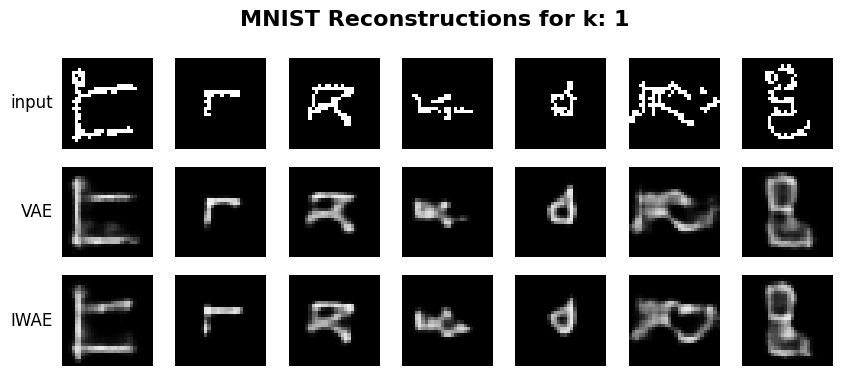

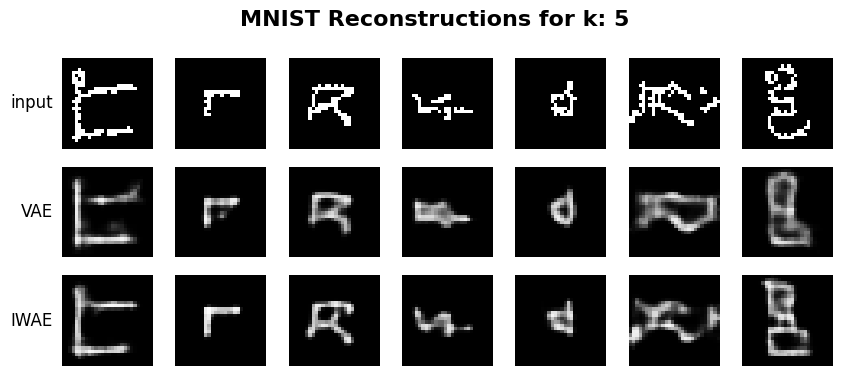

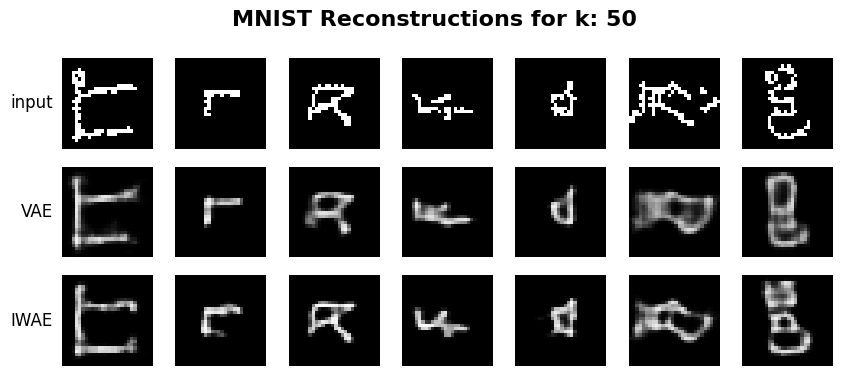

In [24]:
for k in [1,5,50]:
    print_images(k)